# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [79]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Input/city_data.csv"
ride_data_to_load = "Input/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [101]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on="city")
# Display the data table for preview
pyber_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [81]:
#  1. Get the total rides for each city type

CityTy_Rides = pyber_data_df.groupby("type").count()["ride_id"]
CityTy_Rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [134]:
# 2. Get the total drivers for each city type
CityTy_Drivers = pyber_data_df.groupby(["type", "city"]).max()["driver_count"]
Urban_driver = CityTy_Drivers["Urban"].sum()
Suburban_driver = CityTy_Drivers["Suburban"].sum()
Rural_driver = CityTy_Drivers["Rural"].sum()

Drivers_dict = {"Urban": Urban_driver, "Suburban": Suburban_driver, "Rural": Rural_driver}
drivers = pd.Series(Drivers_dict)
drivers.index.rename("type", inplace=True)
drivers

type
Urban       2405
Suburban     490
Rural         78
dtype: int64

In [133]:
#  3. Get the total amount of fares for each city type
CityTy_Fares = pyber_data_df.groupby("type").sum()["fare"]
CityTy_Fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [136]:
#  4. Get the average fare per ride for each city type. 
CityTy_Avg_Fare = CityTy_Fares/CityTy_Rides

In [137]:
# 5. Get the average fare per driver for each city type. 
CityTy_Avg_Fare_Driver = CityTy_Fares/drivers

In [141]:
#  6. Create a PyBer summary DataFrame. 
City_Type_Summary_df = pd.DataFrame({
    "Total Rides": CityTy_Rides,
    "Total Fares": CityTy_Fares,
    "Total Drivers": Drivers_dict,
    "Average Cost per Trip": CityTy_Avg_Fare,
    "Average Driver Intake": CityTy_Avg_Fare_Driver}, index=["Urban", "Suburban", "Rural"])
City_Type_Summary_df.head(10)

,Total Rides,Total Fares,Total Drivers,Average Cost per Trip,Average Driver Intake
Urban,1625,39854.38,2405,24.525772,16.571468
Suburban,625,19356.33,490,30.970128,39.502714
Rural,125,4327.93,78,34.623440,55.486282


In [142]:
#  8. Format the columns.
City_Type_Summary_df["Total Rides"] = City_Type_Summary_df["Total Rides"].map("{:,.0f}".format)
City_Type_Summary_df["Total Drivers"] = City_Type_Summary_df["Total Drivers"].map("{:,.0f}".format)
City_Type_Summary_df["Total Fares"] = City_Type_Summary_df["Total Fares"].map("${:,.2f}".format)
City_Type_Summary_df["Average Cost per Trip"] = City_Type_Summary_df["Average Cost per Trip"].map("${:,.2f}".format)
City_Type_Summary_df["Average Driver Intake"] = City_Type_Summary_df["Average Driver Intake"].map("${:,.2f}".format)
City_Type_Summary_df.to_csv("Output/City_Summary.csv", index=True)
City_Type_Summary_df.head()


,Total Rides,Total Fares,Total Drivers,Average Cost per Trip,Average Driver Intake
Urban,"1,625","$39,854.38","2,405",$24.53,$16.57
Suburban,625,"$19,356.33",490,$30.97,$39.50
Rural,125,"$4,327.93",78,$34.62,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [20]:
# Print the merged DataFrame for reference.
display(pyber_data_df)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_by_date = pyber_data_df.groupby(["date", "type"])["fare"].sum()
pyber_by_date

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [22]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_by_date = pyber_by_date.reset_index()

In [23]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pyber_by_date.pivot(index=["date"], columns=["type"], values=["fare"])


In [24]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_loc_df = pyber_pivot.loc["2019-01-01":"2019-04-29"]
pyber_loc_df

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [25]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_loc_df.index = pd.to_datetime(pyber_loc_df.index)

In [26]:
# 6. Check that the datatype for the index is datetime using df.info()
pyber_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [27]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_week_df = pyber_loc_df.fare.resample("W").sum()
pyber_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


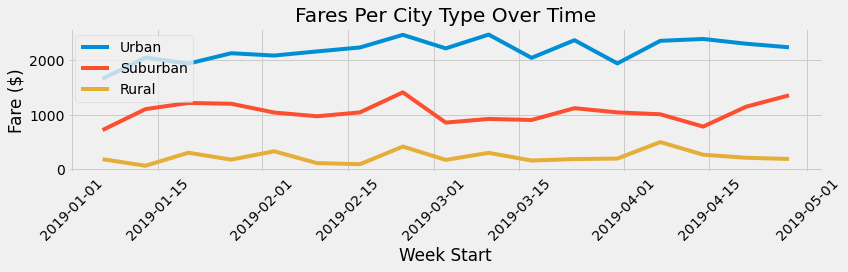

In [28]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax = plt.plot(pyber_week_df["Urban"], label="Urban")
ax = plt.plot(pyber_week_df["Suburban"], label="Suburban")
ax = plt.plot(pyber_week_df["Rural"], label="Rural")
plt.xticks(rotation=45)
plt.xlabel("Week Start")
plt.ylabel("Fare ($)")
plt.title("Fares Per City Type Over Time")
plt.legend(loc="best")
img = plt.gcf()
img.set_size_inches(12,4)
plt.tight_layout()
plt.savefig("Output/Pyber_Fares.png", dpi=200)



